<a href="https://colab.research.google.com/github/SimranaSinha/Masters-Project-FDA/blob/main/Simran_Sinha_Project_1_FDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Task 1** Read the research paper and understand the method used in the work

Urban navigation data is grouped into clusters according to similarity using clustering algorithms, according to the methodology described in the research paper "Urban Navigation Data Clustering: A Comprehensive Review".The main objective was to comprehend the role that street length and entropy play in road quality.
Actions Undertaken:

1. Importing Data:

Used Excel's 'Get Data' function to extract the data from the PDF, then imported it into Google Colab.

2. Data Scaling:

Talked about how crucial it is to keep the scale consistent across all variables when using K-means and hierarchical clustering. Scaled and normalized the features using Standard Scaler and Min-Max Scaler. I used data that was scaled using a min max scaler for additional analysis.

3. Correlations Analysis:

Looked up redundant variables using the correlation matrix. a heatmap was made to show correlations.

4. K-Means Clustering:

Found the ideal number of clusters using the Elbow Method. Using K-Means clustering, cities were grouped according to several road characteristics.

5. Hierarchical Clustering:

Used the entropy feature and population density data to perform hierarchical clustering. investigated four linking techniques for hierarchical clustering: single, complete, average, and Ward's. Using scatter plots and dendrograms, the results of clustering were visualized.

6. Insights and Analysis:

Clusters from hierarchical and K-Means clustering were examined. searched for relationships between various aspects of the route, and subsequently between u and f. discovered information, such the top 5 cities with the best road systems, etc.

Challenges Faced:

I used both Min-Max and Standard Scaler during the scaling process without correctly allocating the original table. Ultimately, I used the Min-Max Scaler on Table 1, and then I used the Standard Scaler on Table 1 itself in the following cell, which led to inaccurate computations.
Encountered difficulties in K-Mean because the cluster was not established due to improper data.

Overall Conclusions:

Understanding k-means and hierarchical clustering algorithms for comprehending and classifying a variety of datasets was aided by this effort. I completed clustering for the city based on entropy and its correlation in addition to clustering multiple cities based on different attributes using these two methods.


Mounting Google Drive into the Colab environment will enable easy file handling and facilitate operations such as reading, writing, and manipulation.

In [ ]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Include Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

# **Task 2** Load the urban navigation data set (Table 1)

If I want to access or save files, it will do so from this place since it will recognize it as the current folder.

In [ ]:
# Set working directory
%cd /content/drive/MyDrive/Research/Datasets/

/content/drive/MyDrive/Research/Datasets


In [ ]:
# Read Urban spatial order file
data = pd.read_csv('/content/drive/MyDrive/Research/Datasets/UrbanSpatialOrder - UrbanSpatialOrder - UrbanSpatialOrder - UrbanSpatialOrder.csv')

In [ ]:
# Print the data
print(data)

          Region        City  φ (Orientation)  Η o (Entropy)  Η w (Weighted)  \
0   Asia/Oceania     Bangkok            0.105          3.465           3.452   
1   Asia/Oceania     Beijing            0.335          3.177           3.206   
2   Asia/Oceania       Hanoi            0.010          3.573           3.572   
3   Asia/Oceania   Hong Kong            0.012          3.571           3.563   
4   Asia/Oceania     Jakarta            0.167          3.391           3.347   
..           ...         ...              ...            ...             ...   
95     US/Canada     Seattle            0.723          2.542           2.474   
96     US/Canada    St Louis            0.276          3.256           3.225   
97     US/Canada     Toronto            0.474          2.980           2.885   
98     US/Canada   Vancouver            0.749          2.488           2.413   
99     US/Canada  Washington            0.377          3.121           3.113   

    ĩ (Street_Length)  ς (Avearge_Circu

In [ ]:
# Print the data
print(data)

          Region        City  φ (Orientation)  Η o (Entropy)  Η w (Weighted)  \
0   Asia/Oceania     Bangkok            0.105          3.465           3.452   
1   Asia/Oceania     Beijing            0.335          3.177           3.206   
2   Asia/Oceania       Hanoi            0.010          3.573           3.572   
3   Asia/Oceania   Hong Kong            0.012          3.571           3.563   
4   Asia/Oceania     Jakarta            0.167          3.391           3.347   
..           ...         ...              ...            ...             ...   
95     US/Canada     Seattle            0.723          2.542           2.474   
96     US/Canada    St Louis            0.276          3.256           3.225   
97     US/Canada     Toronto            0.474          2.980           2.885   
98     US/Canada   Vancouver            0.749          2.488           2.413   
99     US/Canada  Washington            0.377          3.121           3.113   

    ĩ (Street_Length)  ς (Avearge_Circu

In [ ]:
data.describe()

,φ (Orientation),Η o (Entropy),Η w (Weighted),ĩ (Street_Length),ς (Avearge_Circuity),k̅ (Avearge node),P de (P dead-ends),P 4w (P-4way)
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.178790,3.351270,3.339230,82.990000,1.055980,2.923000,0.147580,0.228080
std,0.224408,0.323212,0.337918,27.941044,0.027253,0.264333,0.080086,0.126133
min,0.002000,2.083000,2.103000,23.200000,1.011000,2.348000,0.027000,0.061000
25%,0.024000,3.244250,3.233500,64.550000,1.036750,2.710750,0.083750,0.138250
50%,0.062000,3.514500,3.495500,80.650000,1.052500,2.947500,0.130500,0.191000
75%,0.284750,3.557000,3.553250,97.125000,1.073000,3.107750,0.204250,0.309500
max,0.899000,3.582000,3.581000,233.000000,1.148000,3.548000,0.395000,0.576000


# **Task 3** Preprocess the data (if necessary), such as normalizing or scaling the features

I used Min/Max Scaler to standadrize

In [ ]:
#Importing the preprocessing module from the scikit-learn library for accessingg the min-max scaler and standard scaler classes for scaling and standardizing the data

from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
# rescaling the Ho,Hw,Median,Average_Circuity,Average_Node by MinMax scale

scaler1 = MinMaxScaler()
columns_to_normalize_MinMax = ['Η o (Entropy)',	'Η w (Weighted)','ĩ (Street_Length)','ς (Avearge_Circuity)','k̅ (Avearge node)']
df = data.copy()
df[columns_to_normalize_MinMax] = scaler1.fit_transform(data[columns_to_normalize_MinMax])
df

# by using fit_transform method it will computes the minimum and maximum values and also applies the transformation to the data.

,Region,City,φ (Orientation),Η o (Entropy),Η w (Weighted),ĩ (Street_Length),ς (Avearge_Circuity),k̅ (Avearge node),P de (P dead-ends),P 4w (P-4way)
0,Asia/Oceania,Bangkok,0.105,0.921948,0.912720,0.197331,0.350365,0.030833,0.360,0.108
1,Asia/Oceania,Beijing,0.335,0.729820,0.746279,0.735462,0.306569,0.530833,0.135,0.241
2,Asia/Oceania,Hanoi,0.010,0.993996,0.993911,0.196378,0.394161,0.218333,0.246,0.102
3,Asia/Oceania,Hong Kong,0.012,0.992662,0.987821,0.180172,0.919708,0.486667,0.114,0.174
4,Asia/Oceania,Jakarta,0.167,0.872582,0.841678,0.141087,0.394161,0.327500,0.175,0.096
...,...,...,...,...,...,...,...,...,...,...
95,US/Canada,Seattle,0.723,0.306204,0.251015,0.352717,0.124088,0.632500,0.136,0.369
96,US/Canada,St Louis,0.276,0.782522,0.759134,0.399428,0.087591,0.680833,0.098,0.374
97,US/Canada,Toronto,0.474,0.598399,0.529093,0.380839,0.576642,0.538333,0.109,0.217
98,US/Canada,Vancouver,0.749,0.270180,0.209743,0.383699,0.080292,0.800000,0.073,0.455


In [ ]:
df.head()

,Region,City,φ (Orientation),Η o (Entropy),Η w (Weighted),ĩ (Street_Length),ς (Avearge_Circuity),P de (P dead-ends),P 4w (P-4way),Cluster
0,Asia/Oceania,Bangkok,0.105,0.921948,0.912720,0.197331,0.350365,0.360,0.108,2
1,Asia/Oceania,Beijing,0.335,0.729820,0.746279,0.735462,0.306569,0.135,0.241,0
2,Asia/Oceania,Hanoi,0.010,0.993996,0.993911,0.196378,0.394161,0.246,0.102,2
3,Asia/Oceania,Hong Kong,0.012,0.992662,0.987821,0.180172,0.919708,0.114,0.174,2
4,Asia/Oceania,Jakarta,0.167,0.872582,0.841678,0.141087,0.394161,0.175,0.096,2


In [ ]:
#Droping Catagorical Data
column_to_drop=['Region','City']
df1=df.drop(column_to_drop,axis=1)

In [ ]:
print(df1)

    φ (Orientation)  Η o (Entropy)  Η w (Weighted)  ĩ (Street_Length)  \
0             0.105       0.921948        0.912720           0.197331   
1             0.335       0.729820        0.746279           0.735462   
2             0.010       0.993996        0.993911           0.196378   
3             0.012       0.992662        0.987821           0.180172   
4             0.167       0.872582        0.841678           0.141087   
..              ...            ...             ...                ...   
95            0.723       0.306204        0.251015           0.352717   
96            0.276       0.782522        0.759134           0.399428   
97            0.474       0.598399        0.529093           0.380839   
98            0.749       0.270180        0.209743           0.383699   
99            0.377       0.692462        0.683356           0.363680   

    ς (Avearge_Circuity)  k̅ (Avearge node)  P de (P dead-ends)  P 4w (P-4way)  
0               0.350365           0.03083

# **Task 4** Find out why we need to maintain a uniform scale across the variables for K-means and Hierarchical clustering

The distance between data points is assumed to be significant by K-means and Hierarchical clustering.The variable with the biggest scale will dominate the distance between data points if the variables are on different scales.For these clustering techniques to be effective, a consistent scale must be maintained across the variables.

Ensuring a consistent scale across variables guarantees that every characteristic makes an equal contribution to the process of clustering.

Because K-means and Hierarchical clustering rely on distance measures to assess how similar two data points are, this is significant for both methods.

Larger characteristics may predominate in distance computations if their scales differ, producing skewed grouping outcomes.

Scaling, thus, guarantees equitable comparisons and raises the precision of clustering algorithms.

I'm rescaling the data as a result because we want every column to be treated equally, which means that no column should dominate any other. The column with the biggest value will have the most importance in clustering, which is something we don't want.

Using the provided data, I will apply two distinct techniques: standardization and min-max.
The data will be transformed during normalization so that the distribution that results has a mean of 0 and a standard deviation of 1. (It will indicate how far the data deviates from the mean.)
Next, I will resize all of the column data (except from Ho, P(dead-ends), and P(4-way)) to a fixed range [0,1] using the min-max scale.

# **Task** 5 Do we need to use scaling techniques for this dataset?

Yes, because the features in this dataset are on distinct sizes, scaling techniques are really required.
The clustering may be biased in favor of the distance features as, for instance, the distance features are probably going to be far bigger than the density features.The features of the data and the clustering algorithms being employed determine if scaling approaches are required for a certain dataset. Here are some things to think about:
1. Scale Sensitivity of Algorithms:
   The sensitivity of K-means and Hierarchical clustering to the feature scale is seen. To divide the data into clusters, they rely on distance metrics. The clustering algorithms may favor features with bigger scales if the features have varied scales, which could produce biased clustering results.
2. Range of Feature Values:
Examine each feature's range of values inside the dataset. Scaling can assist bring characteristics with widely disparate ranges closer together, which will enhance the performance of the clustering methods.
3. Uniformity of Feature Scales:
Each feature will contribute equally to the clustering process if all features have uniform scales. This is particularly crucial for algorithms that rely on distance, like K-means.
4. Scaling's effectiveness:
In certain cases, scaling might not be required if the features already have comparable scales or if the clustering technique is resilient to scale variations.

Given these considerations, it is advised that you evaluate the need for scaling approaches by looking at the features of your dataset, including the range and distribution of feature values, and the clustering algorithms you want to employ. Scaling methods like StandardScaler or MinMaxScaler can help enhance the performance and interpretability of the clustering results if the features have varied scales.










# **Task 6** Implement K-means clustering to categorize the data into clusters

In [ ]:
# To implement K-means clustering
k = 3
# Initialize the KMeans model
kmeans = KMeans(n_clusters=k, random_state=42)
# Fit the model to the standardized features
kmeans.fit(df1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


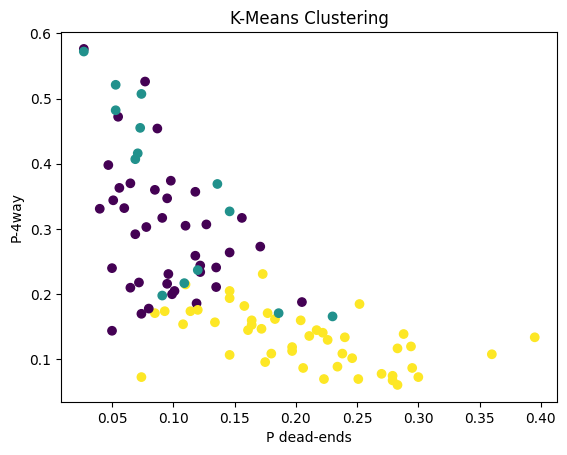

In [ ]:
k = 3
# Initialize the KMeans model
kmeans = KMeans(n_clusters=k, random_state=42)
# Fit the model to the standardized features
kmeans.fit(df1)
# Get cluster assignments for each data point
df['Cluster'] = kmeans.labels_
plt.scatter(df['P de (P dead-ends)'], df['P 4w (P-4way)'], c=df['Cluster'], cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('P dead-ends')
plt.ylabel('P-4way')
plt.show()

***Correlation matrix:***

The correlation matrix will be used in the following stage to determine how each attribute of the dataset connects to the others.

Next, a heatmap will be made to show the correlations between the various columns once the correlation matrix has been calculated.

I'm doing this to see if any variables in the dataset correlate with other variables. If so, using both of them for clustering may be redundant, so I'll only use one of them.

We will solely use entropy for clustering because the heat map of this dataset shows that entropy (Ho) and entropy (weighted) highly correlate with one another.



<ipython-input-25-6f5c52d5368e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


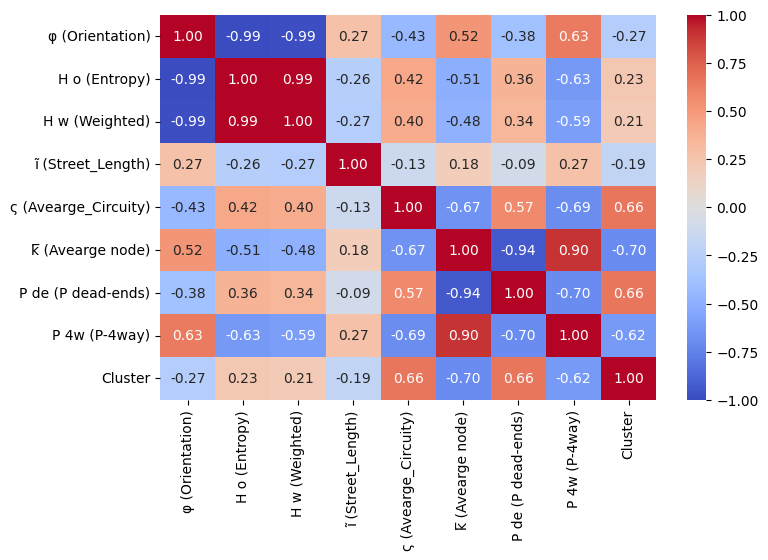

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
# Show the plot
plt.show()

In [ ]:
# Droping Avearge Node as it is higly corelated with Entropy"
column_to_drop=['k̅ (Avearge node)']
df=df.drop(column_to_drop,axis=1)

<ipython-input-27-6f5c52d5368e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


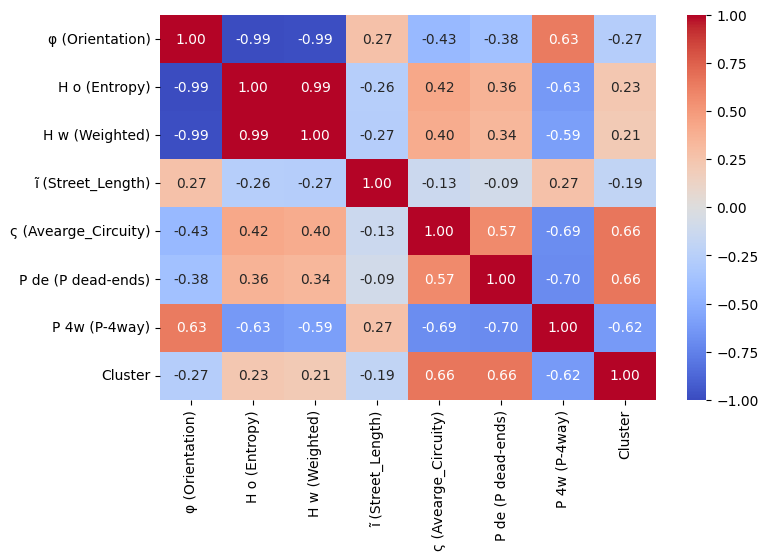

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
# Show the plot
plt.show()

# **Task 7** Use elbow method to determine number of clusters

To hold the number of clusters, an empty list called k was created.
To store within the cluster sum of squares, an empty list called WCSSK was created.
For each value of i in the loop, the algorithm finds clusters 10[1 to 9] times with different starting points. This process is repeated for each iteration of the loop. Created a loop that iterates from 1 to 9 for variable i. This line will create a kmeans clustering model and assign it to variable mdl.
This will add the current value of i to the list k. Here, the model will be trained using data from Table 2, where the first two columns have not been utilized for clustering. The inertia (WCSS) can be used to determine how well data is clustered in a cluster by calculating the sum of squared distances between each data point and the cluster centroid.To make a line plot, use lineplot.               

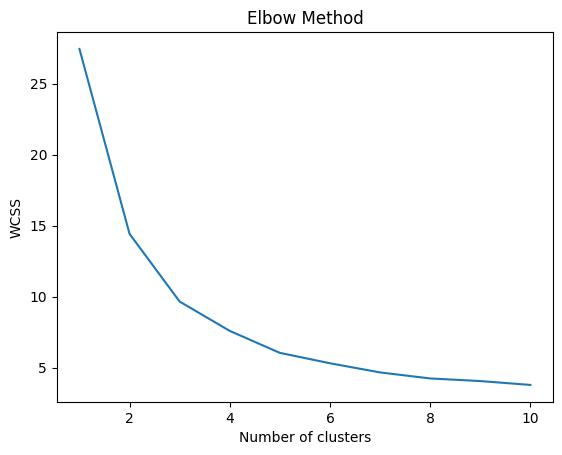

In [ ]:
# Use elbow method to determine number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df1)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# **Task 8** Implement Hierarchical clustering using an appropriate linkage method

Using features, I will apply hierarchical clustering to city data.

First, I'll use the Scipy library to make a dendrogram. [A dendrogram, which displays the arrangement of clusters, is comparable to a tree diagram.]

Then I'll test out four distinct linkage techniques

In [ ]:
# Implement Hierarchical clustering using an appropriate linkage method
hierarchical = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
hierarchical.fit(df1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', n_clusters=3)

# **Task 9** Try all the linkage criteria

Single Linkage: In clusters, determining the shortest path between any two places.

Finding the longest path connecting any two sites in a cluster is known as complete linking.

Finding the average distance between each pair of points in a cluster is known as average linkage.

Ward's Method: Reducing the sum of squared differences in order to reduce the variance within each cluster.

We may learn how various approaches to calculating the distances between clusters affect the clustering outcomes by investigating these techniques.

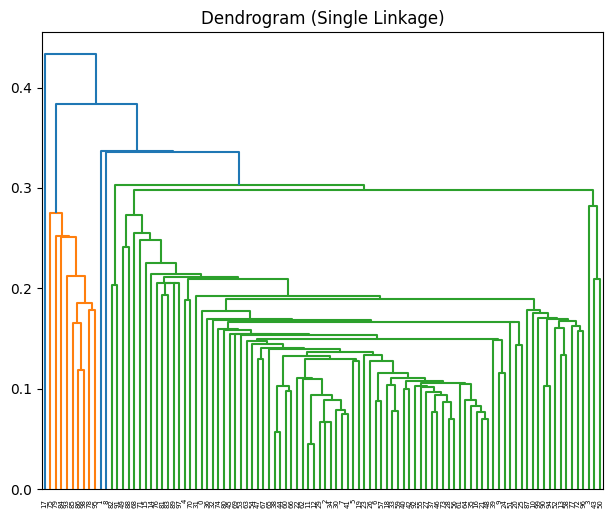

In [ ]:
linkage_methods = ['single']
# List of linkage methods to try
plt.figure(figsize=(12,10))

for i, method in enumerate(linkage_methods):
    plt.subplot(2, 2, i+1)
    Z = linkage(df1, method=method)
# Assuming data is your input data for clustering
    dendrogram(Z)
    plt.title(f'Dendrogram ({method.capitalize()} Linkage)')
# Capitalize the method name for title
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()

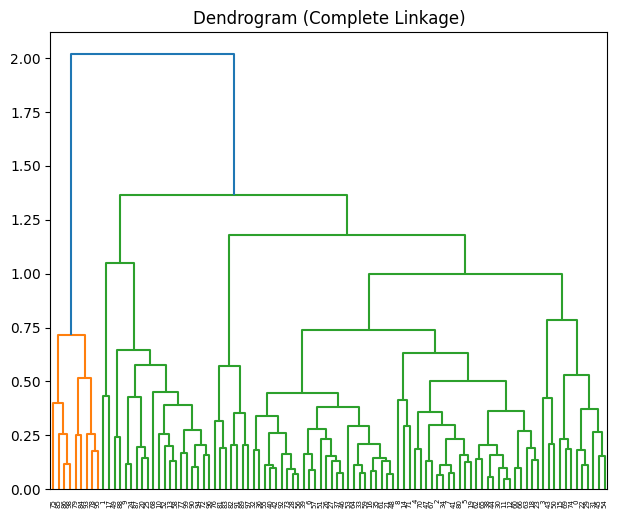

In [ ]:
linkage_methods = ['complete']
# List of linkage methods to try
plt.figure(figsize=(12, 10))

for i, method in enumerate(linkage_methods):
    plt.subplot(2, 2, i+1)
    Z = linkage(df1, method=method)
# Assuming data is your input data for clustering
    dendrogram(Z)
    plt.title(f'Dendrogram ({method.capitalize()} Linkage)')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering

hie_clu_model2 = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage='complete')
hie_clu_model2.fit_predict(hie_clus_table.iloc[:,1:3])
hie_clu_model2.labels_
hie_clus_table2 = hie_clus_table
hie_clus_table2['cluster'] = hie_clu_model2.labels_

hie_clus_table2

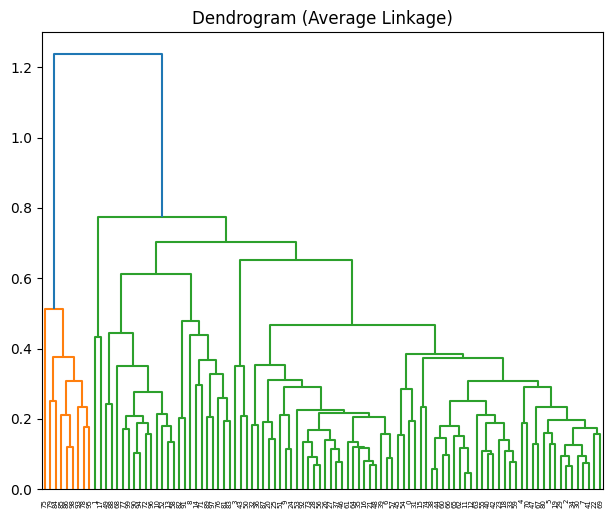

In [ ]:
linkage_methods = ['average']
# List of linkage methods to try
plt.figure(figsize=(12, 10))

for i, method in enumerate(linkage_methods):
    plt.subplot(2, 2, i+1)
    Z = linkage(df1, method=method)
# Assuming data is your input data for clustering
    dendrogram(Z)
    plt.title(f'Dendrogram ({method.capitalize()} Linkage)')

plt.tight_layout()
plt.show()

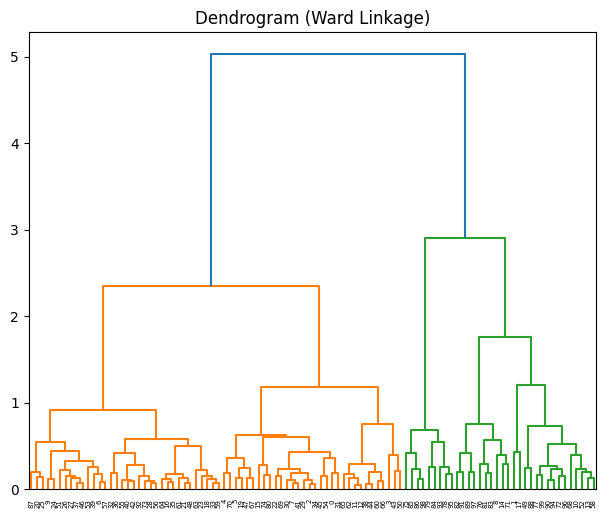

In [ ]:
linkage_methods = ['ward']
# List of linkage methods to try
plt.figure(figsize=(12, 10))

for i, method in enumerate(linkage_methods):
    plt.subplot(2, 2, i+1)
    Z = linkage(df1, method=method)
# Assuming data is your input data for clustering
    dendrogram(Z)
    plt.title(f'Dendrogram ({method.capitalize()} Linkage)')

plt.tight_layout()
plt.show()

In [ ]:
bottom_cities = df.sort_values(by='ĩ (Street_Length)').head(5)
bottom_cities


,Region,City,φ (Orientation),Η o (Entropy),Η w (Weighted),ĩ (Street_Length),ς (Avearge_Circuity),P de (P dead-ends),P 4w (P-4way),Cluster
45,Europe,Venice,0.017,0.987992,0.981055,0.000000,0.576642,0.300,0.073,2
68,Middle East/Africa,Mogadishu,0.375,0.693796,0.804465,0.077216,0.058394,0.055,0.472,0
31,Europe,Helsinki,0.006,0.996664,0.993234,0.089609,0.379562,0.395,0.134,2
65,Middle East/Africa,Jerusalem,0.014,0.990660,0.987145,0.099142,0.591241,0.180,0.109,2
61,Middle East/Africa,Casablanca,0.094,0.929953,0.918809,0.118208,0.270073,0.080,0.178,0


Here, I have classified the Top 5 Cities and Bottom 5 Cities on the basis of P dead ends and Orientation

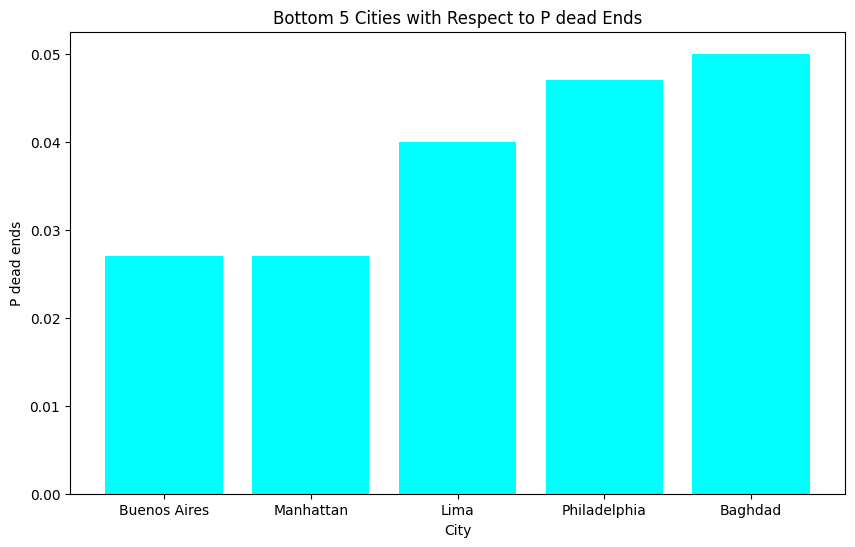

In [ ]:
bottom_cities = df.sort_values(by='P de (P dead-ends)').head(5)

# Plotting the bottom 5 cities
plt.figure(figsize=(10, 6))
plt.bar(bottom_cities['City'], bottom_cities['P de (P dead-ends)'], color='cyan')
plt.xlabel('City')
plt.ylabel('P dead ends')
plt.title('Bottom 5 Cities with Respect to P dead Ends')
plt.show()

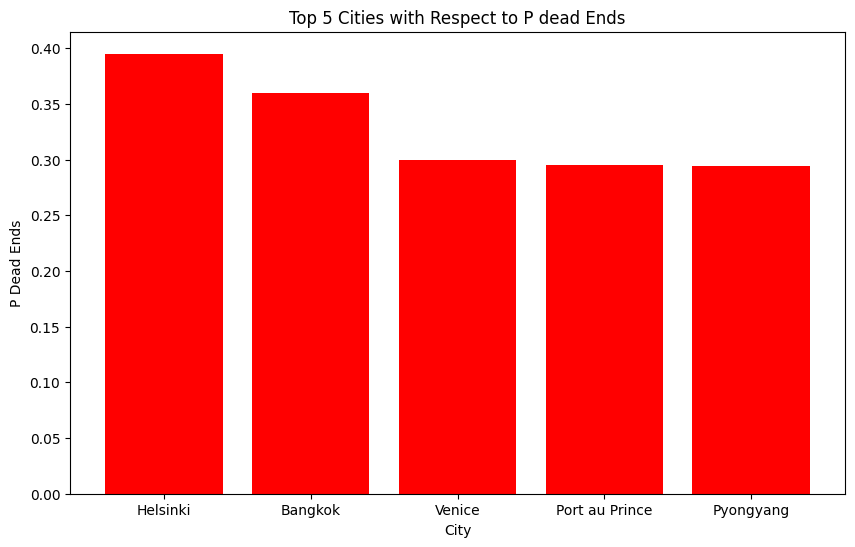

In [ ]:
top_cities = df.sort_values(by='P de (P dead-ends)', ascending=False).head(5)

# Plotting the top 5 cities
plt.figure(figsize=(10, 6))
plt.bar(top_cities['City'], top_cities['P de (P dead-ends)'], color='Red')
plt.xlabel('City')
plt.ylabel('P Dead Ends')
plt.title('Top 5 Cities with Respect to P dead Ends')
plt.show()

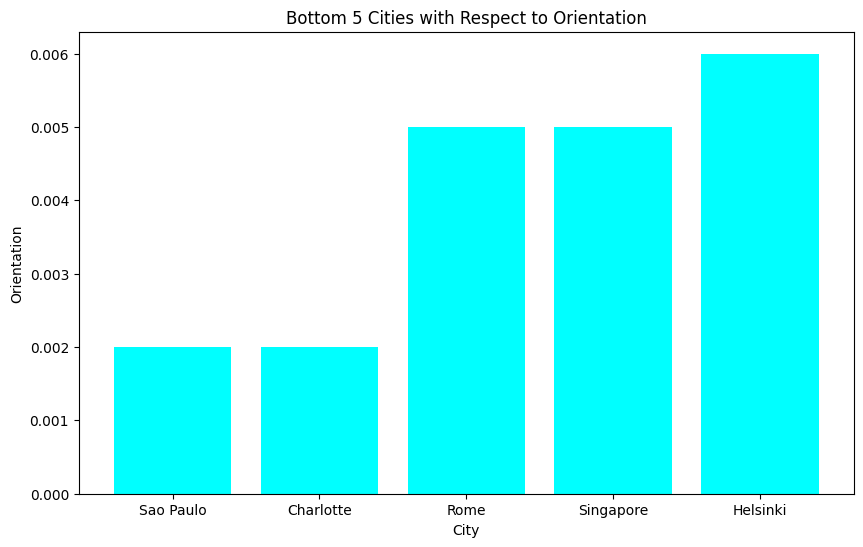

In [ ]:
bottom_cities = df.sort_values(by='φ (Orientation)').head(5)

# Plotting the bottom 5 cities
plt.figure(figsize=(10, 6))
plt.bar(bottom_cities['City'], bottom_cities['φ (Orientation)'], color='cyan')
plt.xlabel('City')
plt.ylabel('Orientation')
plt.title('Bottom 5 Cities with Respect to Orientation')
plt.show()

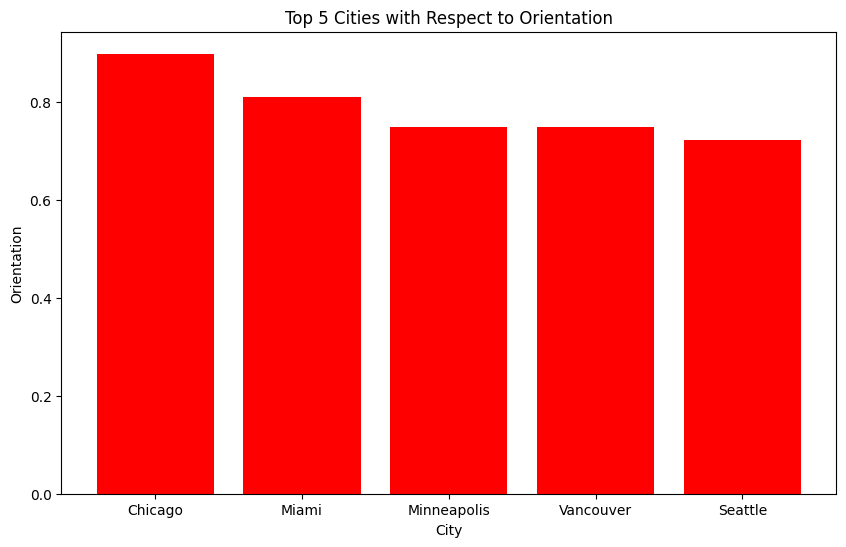

In [ ]:
top_cities = df.sort_values(by='φ (Orientation)', ascending=False).head(5)

# Plotting the top 5 cities
plt.figure(figsize=(10, 6))
plt.bar(top_cities['City'], top_cities['φ (Orientation)'], color='Red')
plt.xlabel('City')
plt.ylabel('Orientation')
plt.title('Top 5 Cities with Respect to Orientation')
plt.show()

**Single Linkage:**

1. The shortest distance between two spots forms a cluster in the first plot, which used the Single Linkage approach.
2. There are benefits to using this strategy to find longer structures.
But when we use this method, the disadvantage is visible in the plot. Clusters (cluster 0 and cluster 2) when we used k means clustering are connected by small groups, creating a chaining effect.
3. This occurs because some cities in the data have higher population densities than other cities; these are known as outliers, and they form strong links with their nearest city, creating a chain-like structure.

**Complete Linkage:**
1. On to the second plot, which made advantage of Complete Linkage.
2. By taking into account the longest distance between any two locations within clusters, this approach produces more spherical and compact clusters.
3. As we can see in the plot if we compare with our k-means model, when we performed hierarchical clustering using the complete linkage method on the same data, the cities in cluster_0 (k-means) were merged with the outskirts of cluster_1 and cluster_2 (k-means). This is because the k-means method aims for the longest distance.
4. However, the plot indicates the formation of distinct and coherent groupings; the issue may be that the cities within one group may belong to another, even though their characteristics are not very complementary.

**Average Linkage:**
1. Average Linkage was selected for the third figure because it strikes a balance between Single and Complete Linkage.
2. The average distance between each pair of points in a cluster is taken into account by this method.
3. The clusters may therefore show modest compactness. but due to its flaw, this isn't seen in the story.
4. This method's disadvantage is that it might not handle clusters with different sizes well. As we can see, cluster_0 has the most cities, thus it prioritizes longer distances, which affects the sizes of the clusters that are found. Clusters become twisted as a result.

**Ward Linkage:**
1. The Ward Method was used in the final plot with the goal of reducing the variance within each cluster. In this way, it attempts to make cities that are part of the same cluster more homogeneous, showing less variation in terms of entropy and population density.
2. The plot's clusters exhibit more uniform densities and sizes.
Ward's Method, however, may oversimplify the situation if the dataset comprises cities with varying characteristics
3. It may eliminate the subtle distinctions between cities by grouping cities with similar characteristics together into clusters that appear more alike. Therefore, to sum up, it might not accurately capture the distinctive qualities of each city.

